# cartopy maps

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade

from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
from astropy.io.misc import yaml

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as w

/home/colin/miniconda3/envs/lt/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


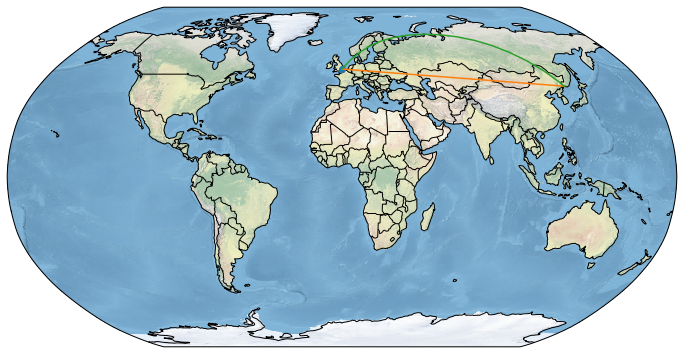

In [35]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic());

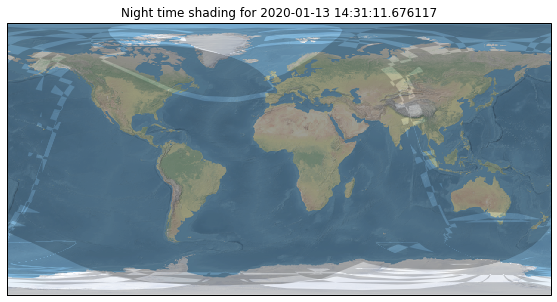

In [25]:
fig2 = plt.figure(figsize=(10, 5))
ax = fig2.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

date = datetime.datetime.now()

ax.set_title(f'Night time shading for {date}')
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.2));

In [26]:
df = pd.read_csv('observatories.csv')
with open('obs.yaml', 'r') as file:
    loc = yaml.load(file)

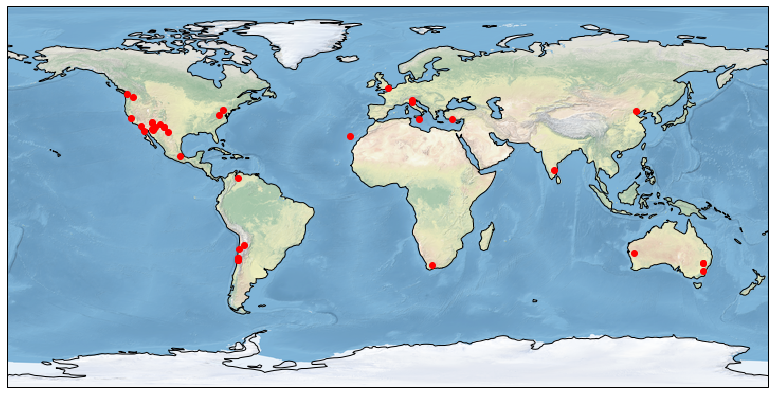

In [33]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.plot(df['lon'], df['lat'], 'ro');

In [40]:
def set_region(selection, show=False):
    if selection is None:
        curr_region = 'NorthAmerica'
    else:
        curr_region = selection['region'].values[0]

    region_df = df[df['region']==curr_region]
    
    if print:
        display(region_df.head(3))
        print(f'{len(region_df.index)} rows total')
    
    return region_df;

In [44]:
regions = list(df.region.unique())
curr_region = 'NorthAmerica'

In [ ]:
def get_ranges():
    height = region_df['lat'].max() - region_df['lat'].min()
    width = region_df['lon'].max() - region_df['lon'].min()
    return height, width

**TODO:** fix extents for continents

In [51]:
sel_from_region = None

def plot_region(region_df):
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    extent = [region_df['lon'].min(), 
              region_df['lon'].max(), 
              region_df['lat'].min(), 
              region_df['lat'].max()]
#     ax.set_extent(extent, crs=ccrs.PlateCarree())

    ax.stock_img()
    ax.coastlines()

    ax.plot(region_df['lon'], region_df['lat'], 'ro') 
    
def update_region(region):
    global curr_region
    curr_region = region
    region_df = df[df['region']==region]
    plot_region(region_df)

In [52]:
style = {'description_width': 'initial'} # to avoid the labels getting truncated
interact(update_region, region = w.RadioButtons(options=regions, value=curr_region,
                                    description='Region:', disabled=False));

interactive(children=(RadioButtons(description='Region:', index=2, options=('NorthAmerica', 'SouthAmerica', 'A…